## Лабораторная работа №2
Свертка с 5 фильтрами 3х3х3(случайные числа), нормализация -> ReLU - >MAXPOOLING(2x2) -> SoftMax

In [4]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import imageio
from random import random

Загружаем изображение:

(340, 450, 3)


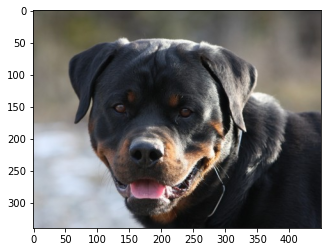

In [5]:
image = cv2.imread('D:\dog.jpg')[:,:,:3]
rows, columns, channels = image.shape
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print(image.shape)

In [ ]:
#Conv

img = image
rows, columns, channels = img.shape

filters = np.random.uniform(0,1 , size = (5,3,3,3))
n, rows_f, columns_f, channels_f = filters.shape

res = np.zeros((n, rows, columns), 'float')
B = [random() for i in range(n)]
for n in range(n):
    for r in range(rows):
        for col in range(columns):
            res[n][r][col] = B[n]
            for r_f in range(rows_f):
                for col_f in range(columns_f):
                    for ch_f in range(channels_f):
                        if (r+r_f < rows) and (col+col_f < columns):
                             res[n][r][col] += np.dot(filters[n][r_f][col_f][ch_f], img[r+r_f][col+col_f][ch_f])

print(res.shape, '\n', res)

In [ ]:
#Normalization

img = res
channels, rows, columns = img.shape

res = np.zeros(img.shape, 'float')

r_a = [random() for i in range(5)]
r_b = [random() for i in range(5)]
for i in range(channels):
    mean = np.mean(img[i,:,:])
    std = np.std(img[i,:,:])
    res[i,:,:] = (r_a[i] * (img[i,:,:] - mean) / std) + r_b[i]

print(res.shape, '\n', res)

In [ ]:
#ReLU

img = res
channels, rows, columns  = img.shape

res = np.zeros((channels, rows, columns), 'float')
  
for ch in range(channels):
    for r in range(rows):
        for col in range(columns):
            res[ch][r][col] = np.maximum(0, img[ch][r][col])

print(res.shape, '\n', res)

In [ ]:
#MaxPooling

img = res
channels, rows, columns = img.shape

half_size_r=int(rows/2)
half_size_col=int(columns/2)

res = np.zeros((5, half_size_r, half_size_col),'float')

for ch in range(channels):
    for r in range(half_size_r):
        for col in range(half_size_col):
            res[ch, r, col] = max(img[ch, r * 2, col * 2], img[ch, r * 2, col * 2 + 1], img[ch, r * 2 + 1, col * 2], img[ch, r * 2 + 1, col * 2 + 1])

print(res.shape, '\n', res)

In [ ]:
#SoftMax

img = res
channels, rows, columns = img.shape

res = np.zeros((channels, rows, columns), 'float')
    
for r in range(rows):
    for col in range(columns):
        tmp_sum = 0
        for ch in range(channels):
            tmp_sum += math.exp(img[ch, r, col])
        for chan in range(channels):
            res[chan, r, col] = math.exp(img[chan, r, col]) / tmp_sum

print(res.shape, '\n', res)